In [1]:
import pandas as pd 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
import re
from collections import Counter
from nltk import ngrams
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups

train = fetch_20newsgroups(subset='train')
test = fetch_20newsgroups(subset='test')


In [3]:
ex = 1000
print(train["data"][ex])

From: dabl2@nlm.nih.gov (Don A.B. Lindbergh)
Subject: Diamond SS24X, Win 3.1, Mouse cursor
Organization: National Library of Medicine
Lines: 10


Anybody seen mouse cursor distortion running the Diamond 1024x768x256 driver?
Sorry, don't know the version of the driver (no indication in the menus) but it's a recently
delivered Gateway system.  Am going to try the latest drivers from Diamond BBS but wondered
if anyone else had seen this.

post or email

--Don Lindbergh
dabl2@lhc.nlm.nih.gov



In [4]:
from keras.preprocessing.text import Tokenizer

max_nb = 20000

df_train = train["data"]
df_test = test["data"]

# vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=max_nb, char_level=False)
tokenizer.fit_on_texts(df_train)
sequences = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\preprocessing\text.py:246: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn(


In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlength = 1000
#pad sequence
x_train = pad_sequences(sequences, maxlen=maxlength)
x_test = pad_sequences(sequences_test, maxlen=maxlength)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (11314, 1000)
Shape of data test tensor: (7532, 1000)


In [5]:
from keras.utils.np_utils import to_categorical

y_train = train["target"]
y_test = test["target"]

y_train = to_categorical(np.asarray(y_train))
print('Shape of label tensor:', y_train.shape)

Shape of label tensor: (11314, 20)


In [6]:
embedding_dim = 50

In [9]:
from keras.layers import Dense, Input, Flatten
from keras.layers import GlobalAveragePooling1D, Embedding
from keras.models import Model


In [12]:
sequence_input = Input(shape=(maxlength,), dtype='int32')

embedding_layer = Embedding(max_nb, embedding_dim,
                            input_length=maxlength,
                            trainable=True)
embedded_sequences = embedding_layer(sequence_input)

In [13]:
from keras.layers import LSTM, Conv1D, MaxPooling1D
from keras.models import Model


sequence_input = Input(shape=(maxlength,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

# 1D convolution with 64 output channels
x = Conv1D(64, 5)(embedded_sequences)
#divide by 5 
x = MaxPooling1D(5)(x)
x = Conv1D(64, 5)(x)
x = MaxPooling1D(5)(x)
# LSTM
x = LSTM(64)(x)
predictions = Dense(20, activation='softmax')(x)

model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [14]:
from keras.layers import Conv1D, MaxPooling1D, Flatten

sequence_input = Input(shape=(maxlength,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

# A 1D convolution with 128 output channels
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
# A 1D convolution with 64 output channels
x = Conv1D(64, 5, activation='relu')(x)
# MaxPool divides the length of the sequence by 5
x = MaxPooling1D(5)(x)
x = Flatten()(x)

predictions = Dense(20, activation='softmax')(x)

model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [18]:
model.fit(x_train, y_train, validation_split=0.1,
          epochs=10, batch_size=128, verbose=2)

Epoch 1/10
80/80 - 19s - loss: 0.0757 - acc: 0.9852 - val_loss: 1.6095 - val_acc: 0.7076 - 19s/epoch - 242ms/step
Epoch 2/10
80/80 - 19s - loss: 0.0399 - acc: 0.9938 - val_loss: 1.6692 - val_acc: 0.7005 - 19s/epoch - 240ms/step
Epoch 3/10
80/80 - 19s - loss: 0.0289 - acc: 0.9962 - val_loss: 1.7429 - val_acc: 0.7014 - 19s/epoch - 237ms/step
Epoch 4/10
80/80 - 20s - loss: 0.0224 - acc: 0.9974 - val_loss: 1.7495 - val_acc: 0.7049 - 20s/epoch - 246ms/step
Epoch 5/10
80/80 - 20s - loss: 0.0180 - acc: 0.9981 - val_loss: 1.8140 - val_acc: 0.7032 - 20s/epoch - 250ms/step
Epoch 6/10
80/80 - 30s - loss: 0.0150 - acc: 0.9983 - val_loss: 1.8273 - val_acc: 0.7102 - 30s/epoch - 379ms/step
Epoch 7/10
80/80 - 22s - loss: 0.0123 - acc: 0.9987 - val_loss: 1.8881 - val_acc: 0.7049 - 22s/epoch - 273ms/step
Epoch 8/10
80/80 - 31s - loss: 0.0104 - acc: 0.9988 - val_loss: 1.9317 - val_acc: 0.6979 - 31s/epoch - 388ms/step
Epoch 9/10
80/80 - 22s - loss: 0.0090 - acc: 0.9991 - val_loss: 1.9311 - val_acc: 0.7032

high batch -> can cause exhausted resource error that can cause by running out of memory.
low batch -> slower training speed

In [41]:
model.fit(x_train, y_train, validation_split=0.1,
          epochs=10, batch_size=128, verbose=2)

Epoch 1/10
80/80 - 80s - loss: 2.9391 - acc: 0.0757 - val_loss: 2.8160 - val_acc: 0.1131 - 80s/epoch - 1s/step
Epoch 2/10
80/80 - 80s - loss: 2.3979 - acc: 0.1701 - val_loss: 2.1768 - val_acc: 0.2173 - 80s/epoch - 997ms/step
Epoch 3/10
80/80 - 76s - loss: 1.8478 - acc: 0.3360 - val_loss: 1.9270 - val_acc: 0.3322 - 76s/epoch - 953ms/step
Epoch 4/10
80/80 - 88s - loss: 1.2116 - acc: 0.5857 - val_loss: 1.4626 - val_acc: 0.5415 - 88s/epoch - 1s/step
Epoch 5/10
80/80 - 75s - loss: 0.6195 - acc: 0.7935 - val_loss: 1.3816 - val_acc: 0.6299 - 75s/epoch - 933ms/step
Epoch 6/10
80/80 - 83s - loss: 0.3031 - acc: 0.9135 - val_loss: 1.4549 - val_acc: 0.6643 - 83s/epoch - 1s/step
Epoch 7/10
80/80 - 75s - loss: 0.1614 - acc: 0.9593 - val_loss: 1.6511 - val_acc: 0.6837 - 75s/epoch - 934ms/step
Epoch 8/10
80/80 - 87s - loss: 0.0860 - acc: 0.9837 - val_loss: 1.7508 - val_acc: 0.6952 - 87s/epoch - 1s/step
Epoch 9/10
80/80 - 94s - loss: 0.0583 - acc: 0.9887 - val_loss: 1.9039 - val_acc: 0.6890 - 94s/epoch

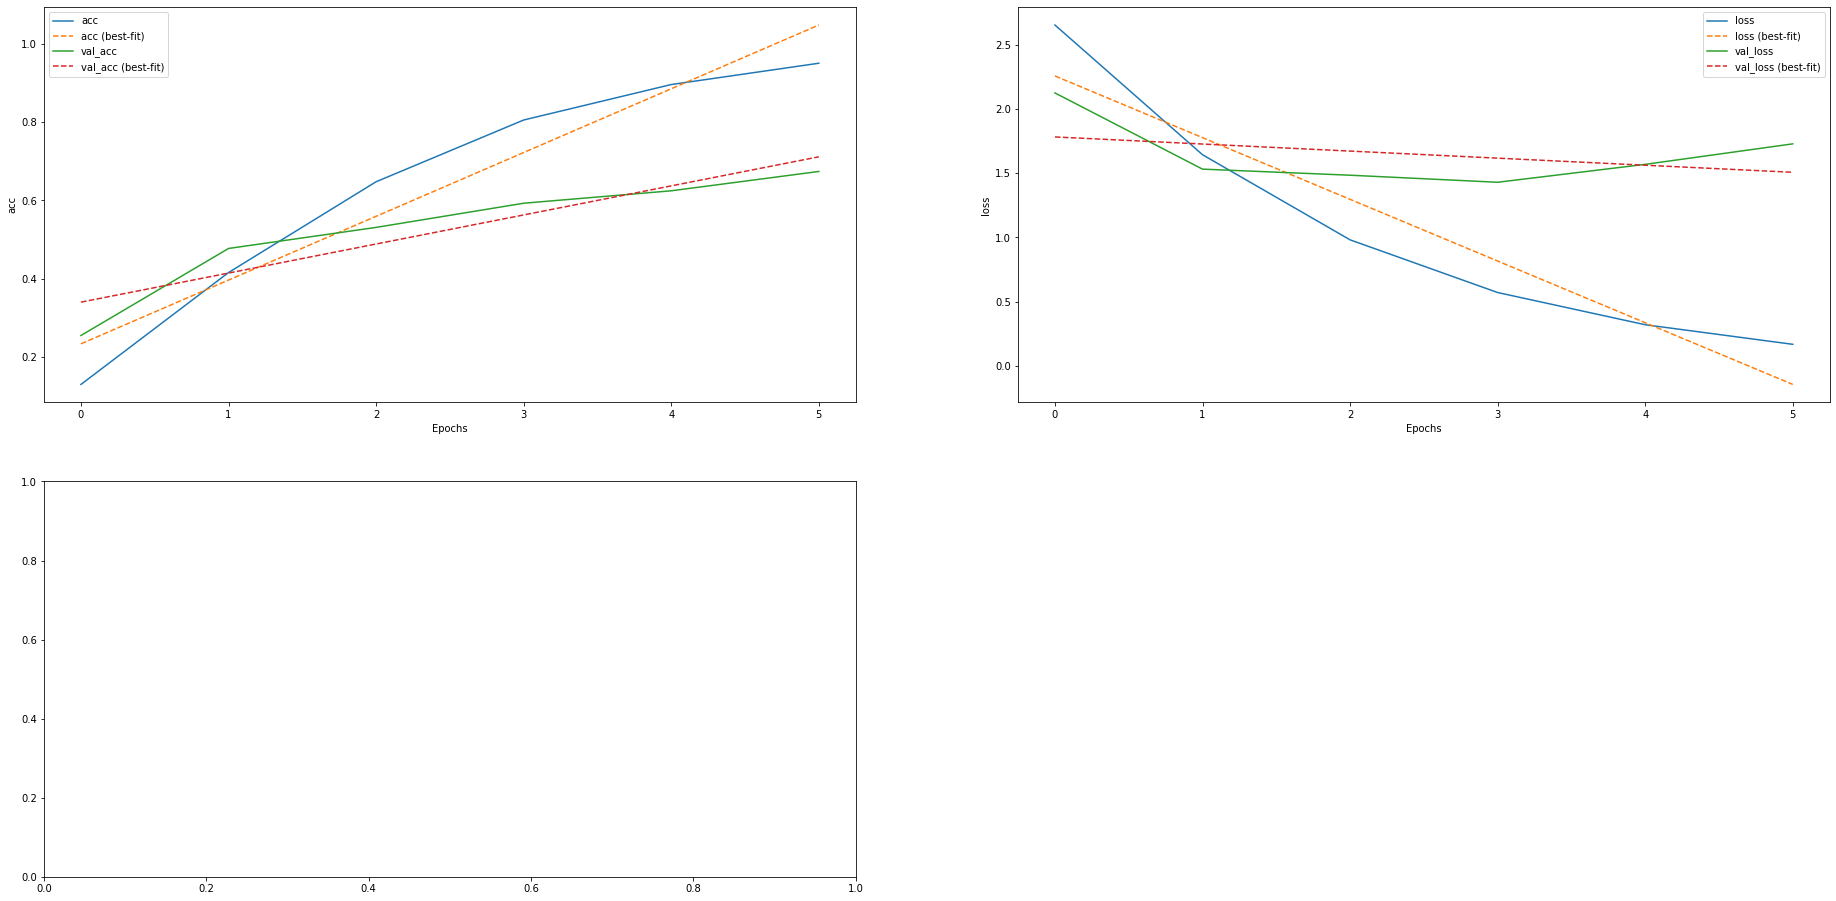

In [19]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    y = history.history[metric]
    y_test = history.history['val_'+metric]
    x = [i for i in range(len(y))]

    plt.plot(y)
    plt.plot(x, np.poly1d(np.poly1d(np.polyfit(x, y, 1))(x)), '--')
    plt.plot(y_test, '')
    plt.plot(x, np.poly1d(np.poly1d(np.polyfit(x, y_test, 1))(x)), '--')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'{metric} (best-fit)', 'val_'+metric, f'val_{metric} (best-fit)'])

plt.figure(figsize=(32, 16))
plt.subplot(2, 2, 1)
plot_graphs(history, 'acc')
plt.subplot(2, 2, 2)
plot_graphs(history, 'loss')
plt.subplot(2, 2, 3)

plt.savefig("final2.png")

In [59]:
num_epochs = 5
early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 2)

history = model.fit(x_train, y_train, 
                    validation_split=0.1,
                    epochs=10, 
                    batch_size=32,
                    callbacks = [early_stop],
                    verbose = 2)

Epoch 1/10
319/319 - 88s - loss: 0.0056 - acc: 0.9992 - val_loss: 2.2836 - val_acc: 0.7341 - 88s/epoch - 276ms/step
Epoch 2/10
319/319 - 86s - loss: 0.0278 - acc: 0.9943 - val_loss: 2.6787 - val_acc: 0.7120 - 86s/epoch - 269ms/step
Epoch 3/10
319/319 - 85s - loss: 0.0776 - acc: 0.9805 - val_loss: 2.3742 - val_acc: 0.7465 - 85s/epoch - 267ms/step


In [15]:
num_epochs = 5
early_stop = EarlyStopping(monitor = 'val_loss',
                           patience = 2)

history = model.fit(x_train, y_train, 
                    validation_split=0.1,
                    epochs=10, 
                    batch_size=32,
                    callbacks = [early_stop],
                    verbose = 2)

Epoch 1/10
319/319 - 24s - loss: 2.6542 - acc: 0.1292 - val_loss: 2.1252 - val_acc: 0.2544 - 24s/epoch - 75ms/step
Epoch 2/10
319/319 - 22s - loss: 1.6438 - acc: 0.4154 - val_loss: 1.5315 - val_acc: 0.4770 - 22s/epoch - 69ms/step
Epoch 3/10
319/319 - 22s - loss: 0.9807 - acc: 0.6477 - val_loss: 1.4841 - val_acc: 0.5309 - 22s/epoch - 70ms/step
Epoch 4/10
319/319 - 23s - loss: 0.5703 - acc: 0.8056 - val_loss: 1.4292 - val_acc: 0.5928 - 23s/epoch - 71ms/step
Epoch 5/10
319/319 - 23s - loss: 0.3195 - acc: 0.8964 - val_loss: 1.5688 - val_acc: 0.6246 - 23s/epoch - 73ms/step
Epoch 6/10
319/319 - 24s - loss: 0.1669 - acc: 0.9509 - val_loss: 1.7284 - val_acc: 0.6740 - 24s/epoch - 76ms/step


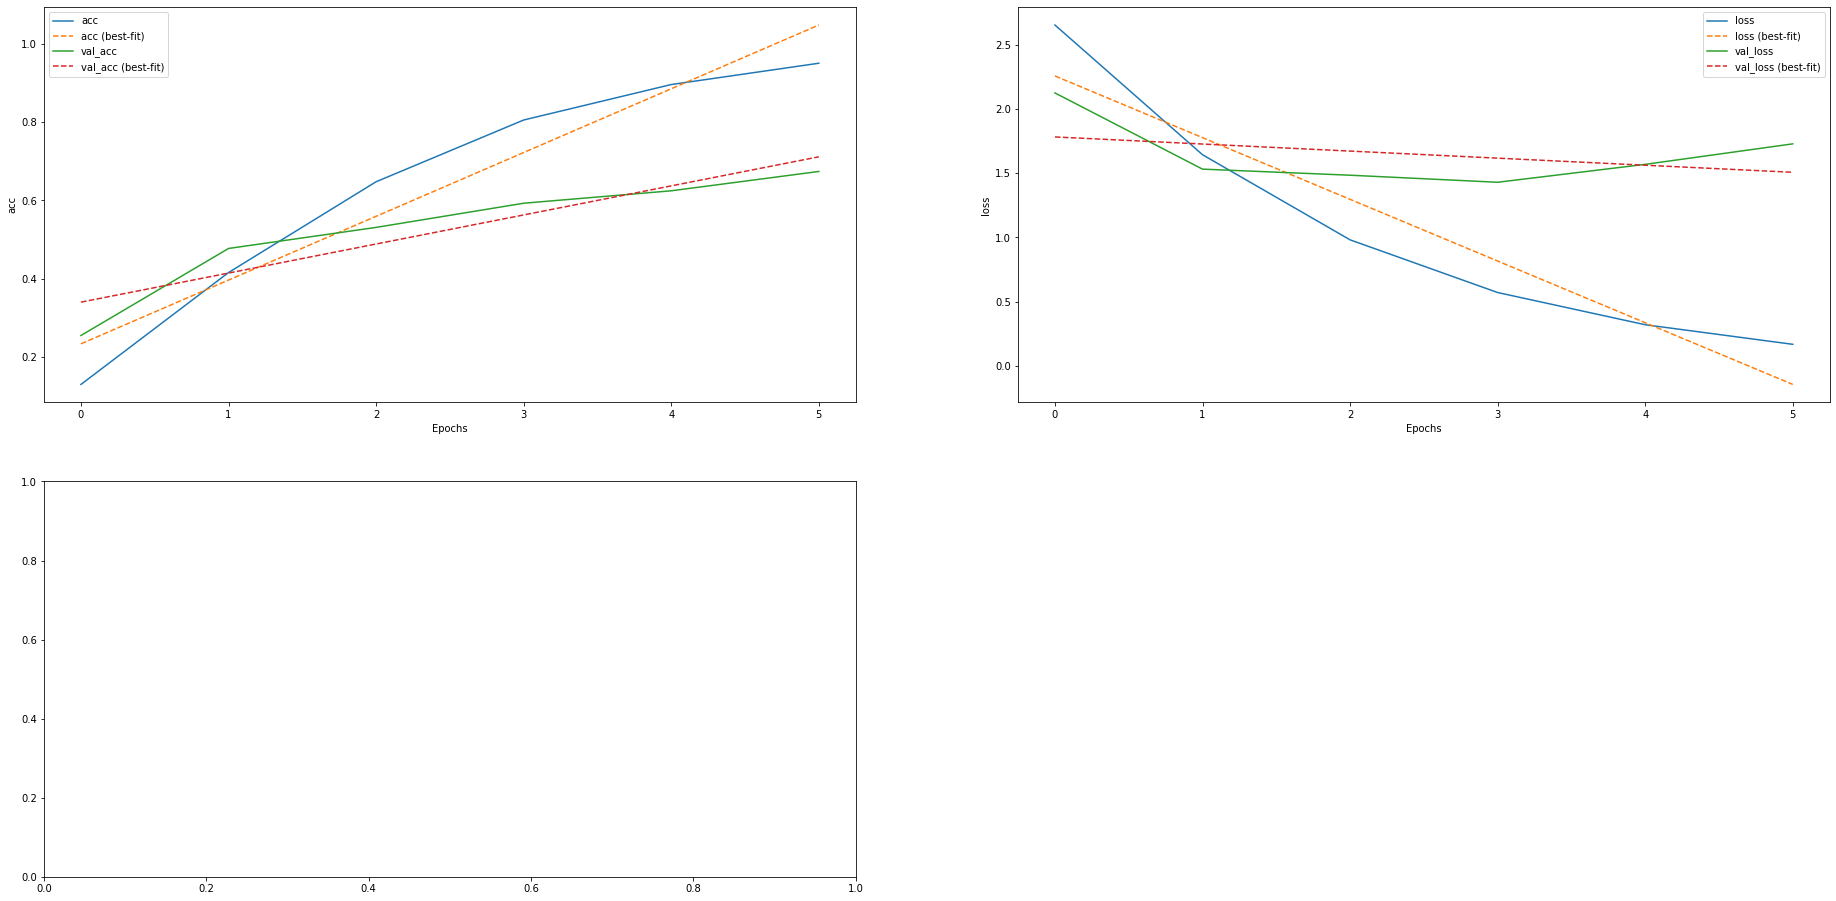

In [17]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
    y = history.history[metric]
    y_test = history.history['val_'+metric]
    x = [i for i in range(len(y))]

    plt.plot(y)
    plt.plot(x, np.poly1d(np.poly1d(np.polyfit(x, y, 1))(x)), '--')
    plt.plot(y_test, '')
    plt.plot(x, np.poly1d(np.poly1d(np.polyfit(x, y_test, 1))(x)), '--')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'{metric} (best-fit)', 'val_'+metric, f'val_{metric} (best-fit)'])

plt.figure(figsize=(32, 16))
plt.subplot(2, 2, 1)
plot_graphs(history, 'acc')
plt.subplot(2, 2, 2)
plot_graphs(history, 'loss')
plt.subplot(2, 2, 3)

plt.savefig("final2.png")